In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read Data
df = pd.read_csv('rawdata.csv')

# Clean Data
df_cleaned = df.drop_duplicates()
df_cleaned = df.dropna()
df_cleaned = df_cleaned.filter(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'pl_controv_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'st_teff', 'st_rad',
       'st_mass', 'st_met', 'st_metratio', 'st_logg', 'sy_dist'])

FileNotFoundError: [Errno 2] No such file or directory: 'rawdata.csv'

In [ ]:
# Calculate Density
#OpenAI. (2025). ChatGPT (Sept 20 version) [Large language model].
#Retrieved from https://chat.openai.com/
EARTH_MASS_KG = 5.972e24
EARTH_RADIUS_M = 6.371e6  # meters


df_cleaned["density_kg_m3"] = (
    df_cleaned["pl_bmasse"] * EARTH_MASS_KG
    / ((4/3) * np.pi * (df_cleaned["pl_rade"] * EARTH_RADIUS_M) ** 3)
)


# If you want g/cm³:
df_cleaned["density_g_cm3"] = df_cleaned["density_kg_m3"] / 1000

# Calculate Inner Boundary
df_cleaned["planet_type"] = np.where(
    df_cleaned["density_g_cm3"] >= 3,
    "Terrestrial",
    "Gaseous"
)


In [ ]:
#Interactive Density Distribution Plot
import plotly.express as px


fig = px.histogram(
    df_cleaned,
    x="density_g_cm3",      
    color="planet_type",     
    nbins=30,
    barmode="overlay",
    title="Interactive Planet Density Distribution"
)
fig.update_layout(
    xaxis_title="Density (g/cm³)",
    yaxis_title="Number of Planets",
    bargap=0.05
)
fig.show()

In [ ]:
print(df_cleaned["planet_type"].value_counts())

planet_type
Gaseous        119
Terrestrial     78
Name: count, dtype: int64


<Axes: xlabel='density_g_cm3', ylabel='Count'>

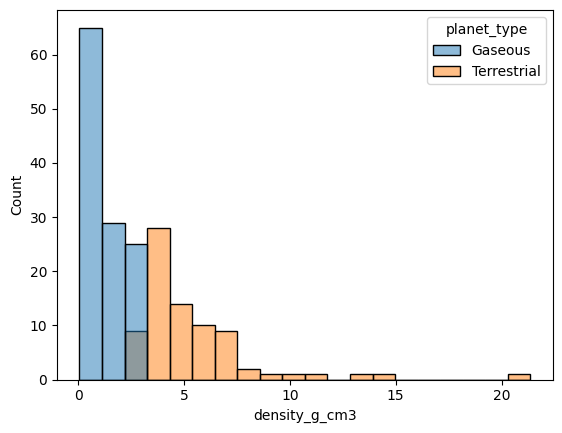

In [ ]:
#Static Density Distribution Plot
df_cleaned.head()

sns.histplot(data=df_cleaned,x="density_g_cm3",hue="planet_type")

In [ ]:
df_cleaned["f_radius"]      = df_cleaned["pl_rade"].between(0.5, 1.6)
df_cleaned["f_mass"]        = df_cleaned["pl_bmasse"].between(0.2, 5.0)
df_cleaned["f_insolation"]  = df_cleaned["pl_insol"].between(0.35, 1.75)
df_cleaned["f_eq_temp"]     = df_cleaned["pl_eqt"].between(180, 310)
df_cleaned["f_star_teff"]   = df_cleaned["st_teff"].between(3500, 6500)
df_cleaned["f_eccentric"]   = df_cleaned["pl_orbeccen"] < 0.2


In [ ]:
print(df_cleaned["pl_rade"].describe())
print(df_cleaned["pl_bmasse"].describe())
print(df_cleaned["pl_insol"].describe())
print(df_cleaned["pl_eqt"].describe())
print(df_cleaned["st_teff"].describe())
print(df_cleaned["pl_orbeccen"].describe())

count    197.000000
mean       6.896561
std        5.162238
min        0.640000
25%        2.390000
50%        5.090000
75%       11.679758
max       22.193820
Name: pl_rade, dtype: float64
count     197.000000
mean      274.382701
std       584.274312
min         0.070000
25%         7.320000
50%        30.000000
75%       254.000000
max      4096.808166
Name: pl_bmasse, dtype: float64
count     197.000000
mean      358.176136
std       796.846229
min         0.342000
25%        12.920000
50%        46.700000
75%       308.000000
max      5805.000000
Name: pl_insol, dtype: float64
count     197.000000
mean      887.538934
std       489.909658
min       251.000000
25%       528.000000
50%       723.000000
75%      1192.000000
max      2429.000000
Name: pl_eqt, dtype: float64
count     197.000000
mean     4890.791878
std      1033.142503
min      2960.000000
25%      3841.000000
50%      5083.000000
75%      5725.000000
max      7690.000000
Name: st_teff, dtype: float64
count    197.000

In [ ]:
criteria_cols = [
    "f_radius", "f_mass", "f_insolation",
    "f_eq_temp", "f_star_teff", "f_eccentric"
]

df_cleaned["Potential Habitability"] = df_cleaned[criteria_cols].sum(axis=1)

Potential Habitability
2    121
1     38
3     23
4     14
0      1
Name: count, dtype: int64

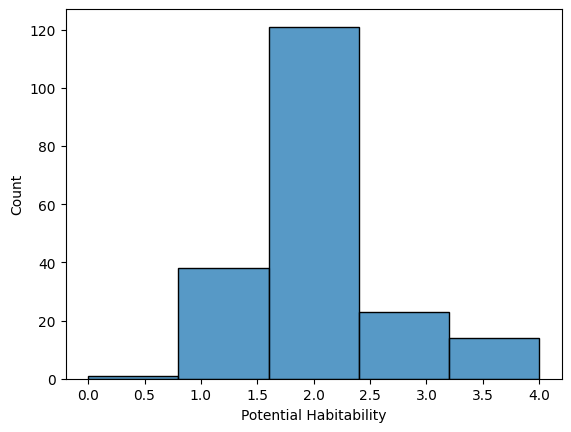

In [ ]:
sns.histplot(data=df_cleaned,x="Potential Habitability",bins=5)
df_cleaned.value_counts("Potential Habitability")

In [ ]:
df_cleaned

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,density_kg_m3,density_g_cm3,planet_type,f_radius,f_mass,f_insolation,f_eq_temp,f_star_teff,f_eccentric,Potential Habitability
500,EPIC 220674823 c,EPIC 220674823,1,1,2,0,13.339890,0.10730,2.840000,0.253368,...,1761.831763,1.761832,Gaseous,False,False,False,False,True,True,2
512,EPIC 249893012 b,EPIC 249893012,1,1,3,0,3.595100,0.04700,1.950000,0.173967,...,6505.978046,6.505978,Terrestrial,False,False,False,False,True,True,2
513,EPIC 249893012 c,EPIC 249893012,1,1,3,0,15.624000,0.13000,3.670000,0.327415,...,1636.214721,1.636215,Gaseous,False,False,False,False,True,True,2
514,EPIC 249893012 d,EPIC 249893012,1,1,3,0,35.747000,0.22000,3.940000,0.351503,...,917.629754,0.917630,Gaseous,False,False,False,False,True,True,2
535,GJ 1132 b,GJ 1132,1,1,2,0,1.628929,0.01570,1.191515,0.106300,...,5987.296479,5.987296,Terrestrial,True,True,False,False,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37781,WASP-19 b,WASP-19,1,1,1,0,0.788839,0.01652,15.860708,1.415000,...,506.803039,0.506803,Gaseous,False,False,False,False,True,True,2
37791,WASP-193 b,WASP-193,1,1,1,0,6.246334,0.06760,16.409948,1.464000,...,55.118107,0.055118,Gaseous,False,False,False,False,True,True,2
38369,WASP-76 b,WASP-76,0,2,1,0,1.809882,0.03304,20.680569,1.845000,...,180.283094,0.180283,Gaseous,False,False,False,False,True,True,2
38373,WASP-77 A b,WASP-77 A,0,2,1,0,1.360029,0.02335,13.787046,1.230000,...,1114.610134,1.114610,Gaseous,False,False,False,False,True,True,2


In [ ]:
print(df_cleaned["f_eccentric"].value_counts())
print(df_cleaned["f_star_teff"].value_counts())
print(df_cleaned["f_eq_temp"].value_counts())
print(df_cleaned["f_insolation"].value_counts())
print(df_cleaned["f_mass"].value_counts())
print(df_cleaned["f_radius"].value_counts())


f_eccentric
True     167
False     30
Name: count, dtype: int64
f_star_teff
True     167
False     30
Name: count, dtype: int64
f_eq_temp
False    193
True       4
Name: count, dtype: int64
f_insolation
False    194
True       3
Name: count, dtype: int64
f_mass
False    161
True      36
Name: count, dtype: int64
f_radius
False    169
True      28
Name: count, dtype: int64


In [ ]:
df_cleaned

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,density_kg_m3,density_g_cm3,planet_type,f_radius,f_mass,f_insolation,f_eq_temp,f_star_teff,f_eccentric,Potential Habitability
500,EPIC 220674823 c,EPIC 220674823,1,1,2,0,13.339890,0.10730,2.840000,0.253368,...,1761.831763,1.761832,Gaseous,False,False,False,False,True,True,2
512,EPIC 249893012 b,EPIC 249893012,1,1,3,0,3.595100,0.04700,1.950000,0.173967,...,6505.978046,6.505978,Terrestrial,False,False,False,False,True,True,2
513,EPIC 249893012 c,EPIC 249893012,1,1,3,0,15.624000,0.13000,3.670000,0.327415,...,1636.214721,1.636215,Gaseous,False,False,False,False,True,True,2
514,EPIC 249893012 d,EPIC 249893012,1,1,3,0,35.747000,0.22000,3.940000,0.351503,...,917.629754,0.917630,Gaseous,False,False,False,False,True,True,2
535,GJ 1132 b,GJ 1132,1,1,2,0,1.628929,0.01570,1.191515,0.106300,...,5987.296479,5.987296,Terrestrial,True,True,False,False,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37781,WASP-19 b,WASP-19,1,1,1,0,0.788839,0.01652,15.860708,1.415000,...,506.803039,0.506803,Gaseous,False,False,False,False,True,True,2
37791,WASP-193 b,WASP-193,1,1,1,0,6.246334,0.06760,16.409948,1.464000,...,55.118107,0.055118,Gaseous,False,False,False,False,True,True,2
38369,WASP-76 b,WASP-76,0,2,1,0,1.809882,0.03304,20.680569,1.845000,...,180.283094,0.180283,Gaseous,False,False,False,False,True,True,2
38373,WASP-77 A b,WASP-77 A,0,2,1,0,1.360029,0.02335,13.787046,1.230000,...,1114.610134,1.114610,Gaseous,False,False,False,False,True,True,2


<Axes: xlabel='pl_rade', ylabel='Count'>

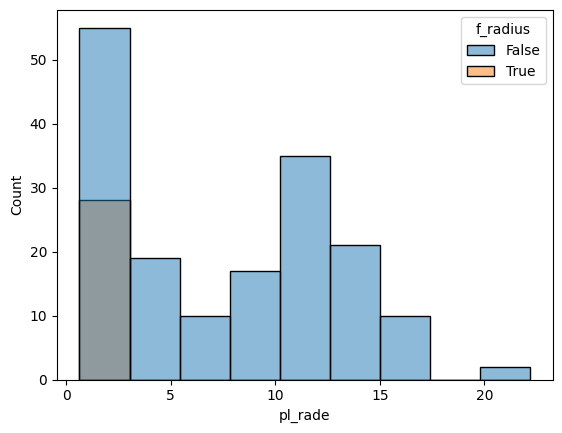

In [ ]:
sns.histplot(data=df_cleaned,x="pl_rade",hue="f_radius")

<Axes: xlabel='pl_bmasse', ylabel='Count'>

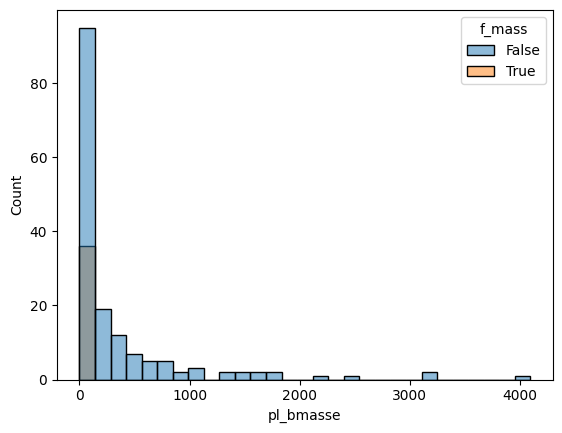

In [ ]:
sns.histplot(data=df_cleaned,x="pl_bmasse",hue="f_mass")

<Axes: xlabel='pl_insol', ylabel='Count'>

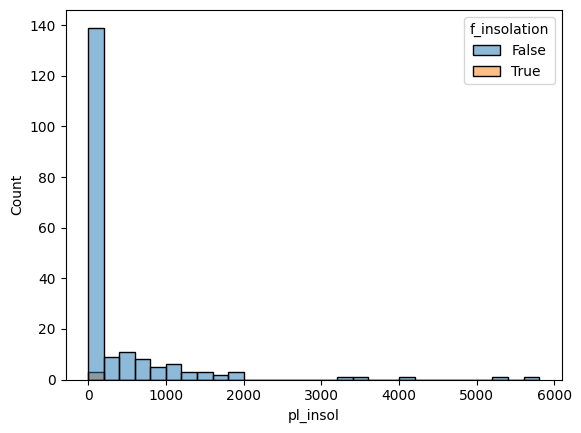

In [ ]:
sns.histplot(data=df_cleaned,x="pl_insol",hue="f_insolation")

<Axes: xlabel='pl_eqt', ylabel='Count'>

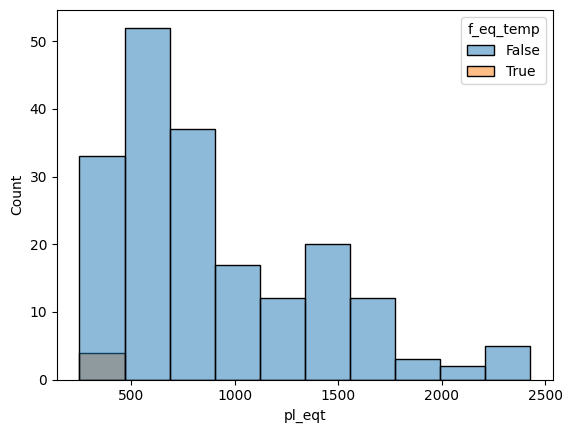

In [ ]:
sns.histplot(data=df_cleaned,x="pl_eqt",hue="f_eq_temp")

<Axes: xlabel='st_teff', ylabel='Count'>

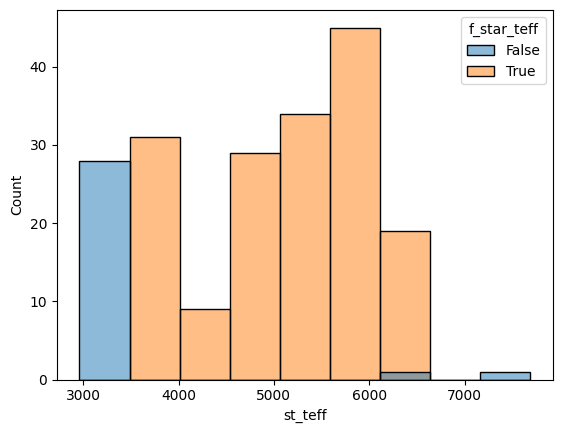

In [ ]:
sns.histplot(data=df_cleaned,x="st_teff",hue="f_star_teff")

In [ ]:
df_cleaned.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,density_kg_m3,density_g_cm3,planet_type,f_radius,f_mass,f_insolation,f_eq_temp,f_star_teff,f_eccentric,Potential Habitability
500,EPIC 220674823 c,EPIC 220674823,1,1,2,0,13.339890,0.1073,2.840000,0.253368,...,1761.831763,1.761832,Gaseous,False,False,False,False,True,True,2
512,EPIC 249893012 b,EPIC 249893012,1,1,3,0,3.595100,0.0470,1.950000,0.173967,...,6505.978046,6.505978,Terrestrial,False,False,False,False,True,True,2
513,EPIC 249893012 c,EPIC 249893012,1,1,3,0,15.624000,0.1300,3.670000,0.327415,...,1636.214721,1.636215,Gaseous,False,False,False,False,True,True,2
514,EPIC 249893012 d,EPIC 249893012,1,1,3,0,35.747000,0.2200,3.940000,0.351503,...,917.629754,0.917630,Gaseous,False,False,False,False,True,True,2
535,GJ 1132 b,GJ 1132,1,1,2,0,1.628929,0.0157,1.191515,0.106300,...,5987.296479,5.987296,Terrestrial,True,True,False,False,False,True,3


<Axes: xlabel='pl_orbeccen', ylabel='Count'>

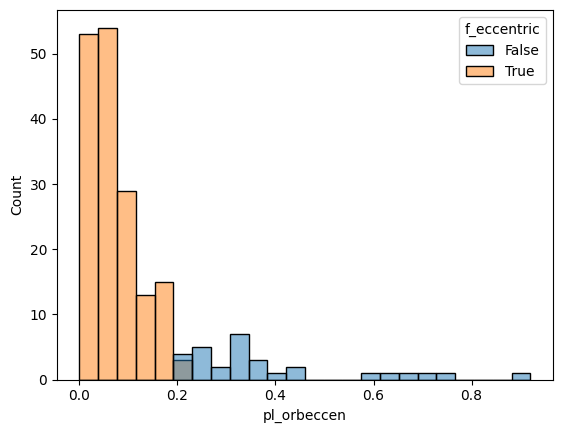

In [ ]:
sns.histplot(data=df_cleaned,x="pl_orbeccen",hue="f_eccentric")

In [ ]:
df_cleaned.head(1)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,density_kg_m3,density_g_cm3,planet_type,f_radius,f_mass,f_insolation,f_eq_temp,f_star_teff,f_eccentric,Potential Habitability
500,EPIC 220674823 c,EPIC 220674823,1,1,2,0,13.33989,0.1073,2.84,0.253368,...,1761.831763,1.761832,Gaseous,False,False,False,False,True,True,2


In [ ]:
for idx, row in df_cleaned.iterrows():
    if row["Potential Habitability"] >= 4:
        print(row["pl_name"])

GJ 367 b
HD 136352 b
HD 219134 c
HD 23472 d
HD 23472 e
HD 23472 f
HD 260655 b
HD 260655 c
K2-266 c
K2-3 c
Kepler-138 c
Kepler-138 d
TOI-1266 c
TOI-500 b


In [ ]:

from sklearn.preprocessing import StandardScaler


# --- 1) Set up columns and Earth reference (matching your labels) ---
cols = ["pl_rade","pl_bmasse","pl_insol","pl_eqt","st_teff","pl_orbeccen"]
earth = {
    "pl_rade": 1.0,          # Earth radii
    "pl_bmasse": 1.0,        # Earth masses
    "pl_insol": 1.0,         # Earth = 1 S_earth
    "pl_eqt": 255.0,         # K (equilibrium temp)
    "st_teff": 5772.0,       # K (Sun)
    "pl_orbeccen": 0.0167,   # Earth's orbital eccentricity
}

# --- 2) Build matrix X and fit scaler on rows that have all six values ---
mask = df_cleaned[cols].notna().all(axis=1)
X = df_cleaned.loc[mask, cols].astype(float).values

scaler = StandardScaler().fit(X)
Xz = scaler.transform(X)

# Earth vector standardized with the SAME scaler (so they’re comparable)
earth_vec = np.array([[earth[c] for c in cols]])
earth_z = scaler.transform(earth_vec)[0]

# --- 3) Distance to Earth in z-score space (Euclidean) ---
dist = np.sqrt(((Xz - earth_z)**2).sum(axis=1))

# Put distances back into the dataframe (NaN where features were missing)
df_cleaned["dist_earth_z"] = dist


In [ ]:
this_planets=df_cleaned[df_cleaned["Potential Habitability"] ==4].sort_values("dist_earth_z")
this_planets = this_planets[["pl_name", "dist_earth_z"]]
this_planets


,pl_name,dist_earth_z
3045,HD 23472 f,1.359183
2190,HD 136352 b,1.425128
3043,HD 23472 e,1.475983
2952,HD 219134 c,1.538059
4922,K2-266 c,1.679657
3041,HD 23472 d,1.752590
12164,Kepler-138 d,1.886048
5125,K2-3 c,1.902421
12139,Kepler-138 c,1.903069
3085,HD 260655 c,2.016546


In [182]:
df_cleaned.columns


Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'pl_controv_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj',
       'pl_bmasse', 'pl_bmassj', 'pl_orbeccen', 'pl_insol', 'pl_eqt',
       'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_metratio', 'st_logg',
       'sy_dist', 'density_kg_m3', 'density_g_cm3', 'planet_type', 'f_radius',
       'f_mass', 'f_insolation', 'f_eq_temp', 'f_star_teff', 'f_eccentric',
       'Potential Habitability', 'dist_earth_z'],
      dtype='object')

<Axes: xlabel='pl_orbeccen', ylabel='pl_orbsmax'>

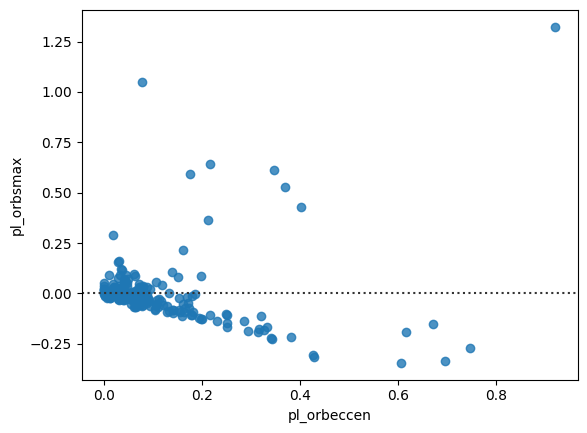

In [194]:
sns.residplot(data=df_cleaned,x="pl_orbeccen",y='pl_orbsmax')

Accuracy on test set: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00         4

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



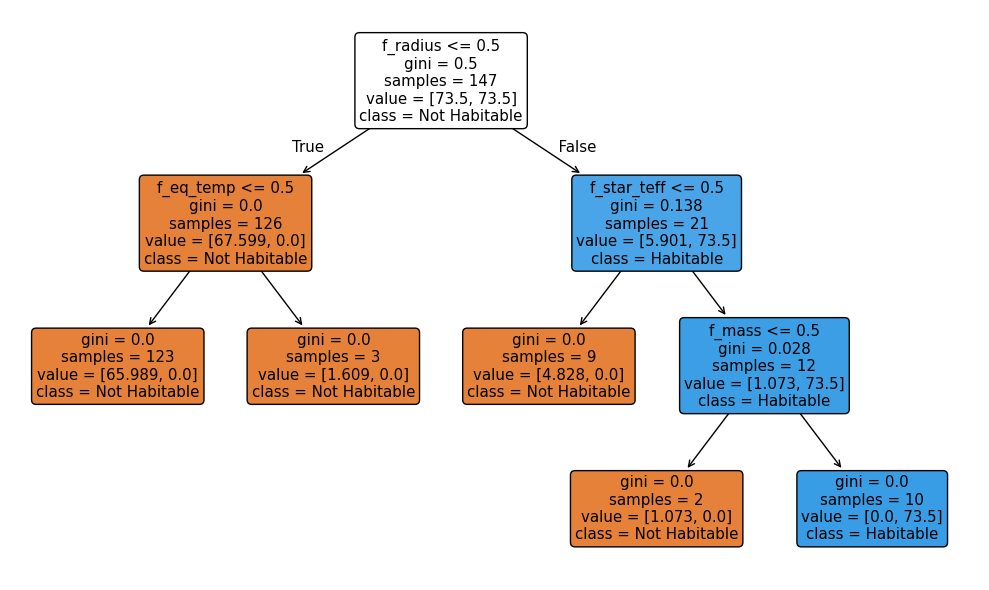


Feature importances:
 f_radius        8.513514e-01
f_star_teff     1.198717e-01
f_mass          2.877698e-02
f_eq_temp       9.291837e-15
f_insolation    0.000000e+00
f_eccentric     0.000000e+00
dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# Code developed with assistance from ChatGPT (GPT-5), OpenAI, conversation on 21 Sept 2025.
# URL: https://chat.openai.com/


# --- 1. Feature set and target -----------------------------------------------
features = ["f_radius", "f_mass", "f_insolation",
            "f_eq_temp", "f_star_teff", "f_eccentric"]

X = df_cleaned[features]

# Example target: Potential Habitability score >= 4 (binary)
y = (df_cleaned["Potential Habitability"] >= 4).astype(int)

# --- 2. Split data -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# --- 3. Fit decision tree ----------------------------------------------------
clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,           # limit depth to avoid overfitting
    class_weight="balanced",
    random_state=42
)
clf.fit(X_train, y_train)

# --- 4. Evaluate -------------------------------------------------------------
print("Accuracy on test set:", clf.score(X_test, y_test))
print("\nClassification report:\n", classification_report(y_test, clf.predict(X_test)))

# --- 5. Visualize the tree ---------------------------------------------------
plt.figure(figsize=(10, 6))
plot_tree(clf,
          feature_names=features,
          class_names=["Not Habitable", "Habitable"],
          filled=True, rounded=True)
plt.tight_layout()
plt.show()

# --- 6. Feature importances --------------------------------------------------
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature importances:\n", importances)

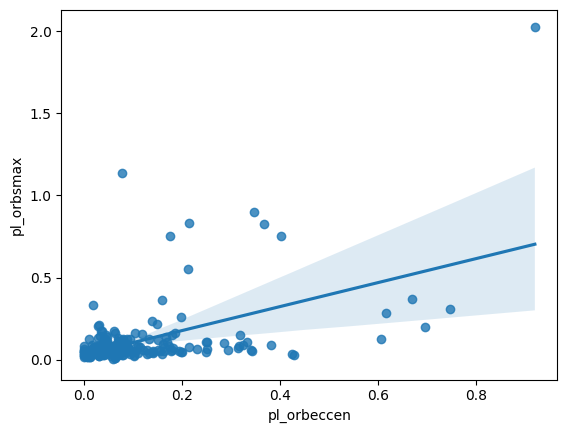

In [ ]:

sns.regplot(data=df_cleaned,x="pl_orbeccen",y='pl_orbsmax')
plt.show()

<Axes: xlabel='pl_bmasse', ylabel='density_g_cm3'>

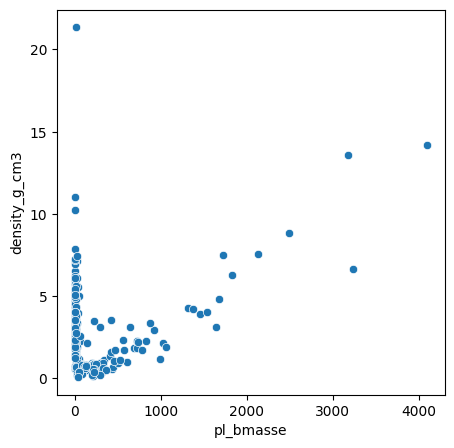

In [188]:
fig, ax = plt.subplots(1, figsize=(5,5))
sns.scatterplot(data=df_cleaned,x="pl_bmasse",y='density_g_cm3',ax=ax)
